# Capstone Project 1 - Data Wrangling

## 0. Introduction to the datasets



The raw data files in this project are acquired from Kaggle at https://www.kaggle.com/mehdidag/black-friday.

The raw csv file is BlackFriday.csv. The file includes dataset of 537,577 observations about the balck Friday in a retail store. It contains different kinds of variables either numerical or categorical including custormer information and purchase information. The variables include 'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'. 

## 1. Import relevant modules

Let's start by importing all relevant modules and packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Import raw data files

In [9]:
df = pd.read_csv('blackFriday.csv')

## 3. Understanding the dataset

Exploratory commands, including df.info(), df.head(), df.tail(), df.describe(), df.columns are executed to build a quick understanding of the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [13]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Understanding the dataset: 

This is a dataset with 537,577 rows and 12 columns.

### Characteristics of the dataset: 

1) Numerical columns:

   'Stay_In_Current_City_Years', 'Purchase'
   
2) Categorical columns:

   'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1', 'Product_Category_2',    'Product_Category_3'
   
3) Missing values:

   Missing values occur in columns of 'Product_Category_2' and 'Product_Category_3', because some products belong to one or two categories, instead of three. 

## 4. Data wrangling strategies

### Set uniform format for column names:

In [15]:
#set all column names to be lowercase names
df.columns=df.columns.str.lower()
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

### Add a new column 'product_category_num' to df:

Here, a new Series 'product_category_num' containing the number of product categories is created and appended to the main set df.

In [20]:
df['product_category_num'] = 3-df.isnull().sum(axis=1)
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase',
       'product_category_num'],
      dtype='object')

### Deal with missing data in df:

Missing data occur in columns of 'product_category_2' and 'product_category_3'. All values in 'product_category_1', 'product_category_2', 'product_category_3' range from 1 to 18 except for missing value. Missing value indicates some products only belong to one or two categories instead of three. So it's better to replace all NaN values into 0 to make data clean.

In [23]:
df=df.fillna(0)
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase,product_category_num
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,1


### Convert data types in columns of 'product_category_2' and 'product_category_3':

The data type of column 'product_category_1' is int64. Data types of columns 'product_category_2' and 'product_category_3' are float64. But columns of 'product_category_2' and 'product_category_3' only contain integer values from 1 to 18, similar as in column 'product_category_1'. Converting data type in 'product_category_2' and 'product_category_3' from float to int will help save up memory.

In [26]:
df['product_category_2']=df['product_category_2'].astype(int)
df['product_category_3']=df['product_category_3'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            537577 non-null int32
product_category_3            537577 non-null int32
purchase                      537577 non-null int64
product_category_num          537577 non-null int64
dtypes: int32(2), int64(6), object(5)
memory usage: 49.2+ MB


### Exam column 'purchase' for outliers:

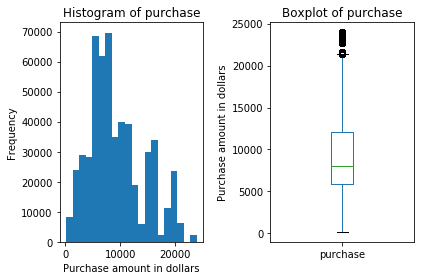

In [31]:
# plot histogram of column 'purchase'
plt.subplot(1,2,1)
df['purchase'].plot(kind='hist', bins=20)
plt.xlabel('Purchase amount in dollars')
plt.title('Histogram of purchase')

# plot boxplot of column 'purchase'
plt.subplot(1,2,2)
df['purchase'].plot(kind='box')
plt.ylabel('Purchase amount in dollars')
plt.title('Boxplot of purchase')
plt.tight_layout()

### Save cleaned dataset to CSV file:

In [32]:
df.to_csv('blackfriday_clean.csv')